In [3]:
# Connect to existing database or create a new one if none exist
import sqlite3

con = sqlite3.connect("D:\Work\Documents\Pribadi\Belajar\Project\Chicago Data\Chicago Data.db")
cur = con.cursor()

In [49]:
# Import csv to dataframe
!pip install pd

import csv
import pandas as pd

df1 = pd.read_csv("D:\Work\Documents\Pribadi\Belajar\Project\Chicago Data\ChicagoCensusData.csv")
df2 = pd.read_csv("D:\Work\Documents\Pribadi\Belajar\Project\Chicago Data\ChicagoPublicSchools.csv")
df3 = pd.read_csv("D:\Work\Documents\Pribadi\Belajar\Project\Chicago Data\ChicagoCrimeData.csv")

In [12]:
# Store dataframes to tables
df1.to_sql("CENSUS_DATA", con, if_exists='replace', index=False, method="multi")
df2.to_sql("CHICAGO_PUBLIC_SCHOOLS", con, if_exists='replace', index=False, method="multi")
df3.to_sql("CHICAGO_CRIME_DATA", con, if_exists='replace', index=False, method="multi")

533

In [50]:
# Verify tables creation
df_tables = pd.read_sql("SELECT name FROM sqlite_master WHERE type='table';", con)
df_tables

,name
0,CENSUS_DATA
1,CHICAGO_PUBLIC_SCHOOLS
2,CHICAGO_CRIME_DATA


In [51]:
# View the first 5 rows of CENSUS_DATA table
query = "SELECT * FROM CENSUS_DATA LIMIT 5;"
df = pd.read_sql(query, con)
df

,COMMUNITY_AREA_NUMBER,COMMUNITY_AREA_NAME,PERCENT_OF_HOUSING_CROWDED,PERCENT_HOUSEHOLDS_BELOW_POVERTY,PERCENT_AGED_16__UNEMPLOYED,PERCENT_AGED_25__WITHOUT_HIGH_SCHOOL_DIPLOMA,PERCENT_AGED_UNDER_18_OR_OVER_64,PER_CAPITA_INCOME,HARDSHIP_INDEX
0,1.0,Rogers Park,7.7,23.6,8.7,18.2,27.5,23939,39.0
1,2.0,West Ridge,7.8,17.2,8.8,20.8,38.5,23040,46.0
2,3.0,Uptown,3.8,24.0,8.9,11.8,22.2,35787,20.0
3,4.0,Lincoln Square,3.4,10.9,8.2,13.4,25.5,37524,17.0
4,5.0,North Center,0.3,7.5,5.2,4.5,26.2,57123,6.0


In [53]:
# View the first 5 rows of CHICAGO_PUBLIC_SCHOOLS table
query = "SELECT * FROM CHICAGO_PUBLIC_SCHOOLS LIMIT 5;"
df = pd.read_sql(query, con)
df

,School_ID,NAME_OF_SCHOOL,"Elementary, Middle, or High School",Street_Address,City,State,ZIP_Code,Phone_Number,Link,Network_Manager,...,Freshman_on_Track_Rate__,X_COORDINATE,Y_COORDINATE,Latitude,Longitude,COMMUNITY_AREA_NUMBER,COMMUNITY_AREA_NAME,Ward,Police_District,Location
0,610038,Abraham Lincoln Elementary School,ES,615 W Kemper Pl,Chicago,IL,60614,(773) 534-5720,http://schoolreports.cps.edu/SchoolProgressRep...,Fullerton Elementary Network,...,NDA,1171699.458,1915829.428,41.924497,-87.644522,7,LINCOLN PARK,43,18,"(41.92449696, -87.64452163)"
1,610281,Adam Clayton Powell Paideia Community Academy ...,ES,7511 S South Shore Dr,Chicago,IL,60649,(773) 535-6650,http://schoolreports.cps.edu/SchoolProgressRep...,Skyway Elementary Network,...,NDA,1196129.985,1856209.466,41.760324,-87.556736,43,SOUTH SHORE,7,4,"(41.76032435, -87.55673627)"
2,610185,Adlai E Stevenson Elementary School,ES,8010 S Kostner Ave,Chicago,IL,60652,(773) 535-2280,http://schoolreports.cps.edu/SchoolProgressRep...,Midway Elementary Network,...,NDA,1148427.165,1851012.215,41.747111,-87.731702,70,ASHBURN,13,8,"(41.74711093, -87.73170248)"
3,609993,Agustin Lara Elementary Academy,ES,4619 S Wolcott Ave,Chicago,IL,60609,(773) 535-4389,http://schoolreports.cps.edu/SchoolProgressRep...,Pershing Elementary Network,...,NDA,1164504.290,1873959.199,41.809757,-87.672145,61,NEW CITY,20,9,"(41.8097569, -87.6721446)"
4,610513,Air Force Academy High School,HS,3630 S Wells St,Chicago,IL,60609,(773) 535-1590,http://schoolreports.cps.edu/SchoolProgressRep...,Southwest Side High School Network,...,91.8,1175177.622,1880745.126,41.828146,-87.632794,34,ARMOUR SQUARE,11,9,"(41.82814609, -87.63279369)"


In [55]:
# View the first 5 rows of CHICAGO_CRIME_DATA table
query = "SELECT * FROM CHICAGO_CRIME_DATA LIMIT 5;"
df = pd.read_sql(query, con)
df

,ID,CASE_NUMBER,DATE,BLOCK,IUCR,PRIMARY_TYPE,DESCRIPTION,LOCATION_DESCRIPTION,ARREST,DOMESTIC,...,DISTRICT,WARD,COMMUNITY_AREA_NUMBER,FBICODE,X_COORDINATE,Y_COORDINATE,YEAR,LATITUDE,LONGITUDE,LOCATION
0,3512276,HK587712,2004-08-28,047XX S KEDZIE AVE,890,THEFT,FROM BUILDING,SMALL RETAIL STORE,0,0,...,9,14.0,58.0,6,1155838.0,1873050.0,2004,41.807440,-87.703956,"(41.8074405, -87.703955849)"
1,3406613,HK456306,2004-06-26,009XX N CENTRAL PARK AVE,820,THEFT,$500 AND UNDER,OTHER,0,0,...,11,27.0,23.0,6,1152206.0,1906127.0,2004,41.898280,-87.716406,"(41.898279962, -87.716405505)"
2,8002131,HT233595,2011-04-04,043XX S WABASH AVE,820,THEFT,$500 AND UNDER,NURSING HOME/RETIREMENT HOME,0,0,...,2,3.0,38.0,6,1177436.0,1876313.0,2011,41.815933,-87.624642,"(41.815933131, -87.624642127)"
3,7903289,HT133522,2010-12-30,083XX S KINGSTON AVE,840,THEFT,FINANCIAL ID THEFT: OVER $300,RESIDENCE,0,0,...,4,7.0,46.0,6,1194622.0,1850125.0,2010,41.743665,-87.562463,"(41.743665322, -87.562462756)"
4,10402076,HZ138551,2016-02-02,033XX W 66TH ST,820,THEFT,$500 AND UNDER,ALLEY,0,0,...,8,15.0,66.0,6,1155240.0,1860661.0,2016,41.773455,-87.706480,"(41.773455295, -87.706480471)"


In [56]:
# Find the total number of crimes recorded in the CRIME table
query = "SELECT COUNT(*) FROM CHICAGO_CRIME_DATA;"
df = pd.read_sql(query, con)
df

,COUNT(*)
0,533


In [57]:
# List community area names and numbers with per capita income less than 11000
query = "SELECT COMMUNITY_AREA_NUMBER, COMMUNITY_AREA_NAME, PER_CAPITA_INCOME \
         FROM CENSUS_DATA \
         WHERE PER_CAPITA_INCOME < 11000;"
df = pd.read_sql(query, con)
df

,COMMUNITY_AREA_NUMBER,COMMUNITY_AREA_NAME,PER_CAPITA_INCOME
0,26.0,West Garfield Park,10934
1,30.0,South Lawndale,10402
2,37.0,Fuller Park,10432
3,54.0,Riverdale,8201


In [58]:
# List all case numbers for crimes involving minors? (children are not considered minors for the purposes of crime analysis)
query = "SELECT CASE_NUMBER, DESCRIPTION \
         FROM CHICAGO_CRIME_DATA \
         WHERE DESCRIPTION LIKE '%MINOR%';"
df = pd.read_sql(query, con)
df

,CASE_NUMBER,DESCRIPTION
0,HL266884,SELL/GIVE/DEL LIQUOR TO MINOR
1,HK238408,ILLEGAL CONSUMPTION BY MINOR


In [59]:
# List all kidnapping crimes involving a child
query = "SELECT * \
         FROM CHICAGO_CRIME_DATA \
         WHERE DESCRIPTION LIKE '%CHILD%' AND PRIMARY_TYPE LIKE '%KIDNAP%';"
df = pd.read_sql(query, con)
df

,ID,CASE_NUMBER,DATE,BLOCK,IUCR,PRIMARY_TYPE,DESCRIPTION,LOCATION_DESCRIPTION,ARREST,DOMESTIC,...,DISTRICT,WARD,COMMUNITY_AREA_NUMBER,FBICODE,X_COORDINATE,Y_COORDINATE,YEAR,LATITUDE,LONGITUDE,LOCATION
0,5276766,HN144152,2007-01-26,050XX W VAN BUREN ST,1792,KIDNAPPING,CHILD ABDUCTION/STRANGER,STREET,0,0,...,15,29.0,25.0,20,1143050.0,1897546.0,2007,41.874908,-87.750249,"(41.874908413, -87.750249307)"


In [60]:
# List the kind of crimes that were recorded at schools (no repetitions)
query = "SELECT DISTINCT(PRIMARY_TYPE) \
         FROM CHICAGO_CRIME_DATA \
         WHERE LOCATION_DESCRIPTION LIKE '%SCHOOL%';"
df = pd.read_sql(query, con)
df

,PRIMARY_TYPE
0,BATTERY
1,CRIMINAL DAMAGE
2,NARCOTICS
3,ASSAULT
4,CRIMINAL TRESPASS
5,PUBLIC PEACE VIOLATION


In [61]:
# List the type of schools along with the average safety score for each type
query = """SELECT "Elementary, Middle, or High School", AVG(SAFETY_SCORE) \
           FROM CHICAGO_PUBLIC_SCHOOLS \
           GROUP BY "Elementary, Middle, or High School";"""
df = pd.read_sql(query, con)
df

,"Elementary, Middle, or High School",AVG(SAFETY_SCORE)
0,ES,49.520384
1,HS,49.623529
2,MS,48.000000


In [62]:
# List 5 community areas with highest % of households below poverty line
query = "SELECT COMMUNITY_AREA_NAME, PERCENT_HOUSEHOLDS_BELOW_POVERTY \
         FROM CENSUS_DATA \
         ORDER BY PERCENT_HOUSEHOLDS_BELOW_POVERTY DESC \
         LIMIT 5;"
df = pd.read_sql(query, con)
df

,COMMUNITY_AREA_NAME,PERCENT_HOUSEHOLDS_BELOW_POVERTY
0,Riverdale,56.5
1,Fuller Park,51.2
2,Englewood,46.6
3,North Lawndale,43.1
4,East Garfield Park,42.4


In [63]:
# Show the most crime prone community area with community area number only
query = "SELECT COMMUNITY_AREA_NUMBER \
         FROM CHICAGO_CRIME_DATA \
         GROUP BY COMMUNITY_AREA_NUMBER \
         ORDER BY COUNT(*) DESC \
         LIMIT 1;"
df = pd.read_sql(query, con)
df

,COMMUNITY_AREA_NUMBER
0,25.0


In [64]:
# Find the name of the community area with highest hardship index using a sub-query
query = "SELECT COMMUNITY_AREA_NAME, HARDSHIP_INDEX \
         FROM CENSUS_DATA \
         WHERE HARDSHIP_INDEX = ( \
         SELECT MAX(HARDSHIP_INDEX) \
         FROM CENSUS_DATA);"
df = pd.read_sql(query, con)
df

,COMMUNITY_AREA_NAME,HARDSHIP_INDEX
0,Riverdale,98.0


In [65]:
# Determining the Community Area Name with most number of crimes using a sub-query
query = "SELECT COMMUNITY_AREA_NAME \
         FROM CENSUS_DATA \
         WHERE COMMUNITY_AREA_NUMBER = ( \
         SELECT COMMUNITY_AREA_NUMBER \
         FROM CHICAGO_CRIME_DATA \
         GROUP BY COMMUNITY_AREA_NUMBER \
         ORDER BY COUNT(*) DESC \
         LIMIT 1);"
df = pd.read_sql(query, con)
df

,COMMUNITY_AREA_NAME
0,Austin


In [81]:
# Install and import necessary libraries for visualization
!pip install matplotlib 
!pip install seaborn
import matplotlib.pyplot as plt
import seaborn as sns

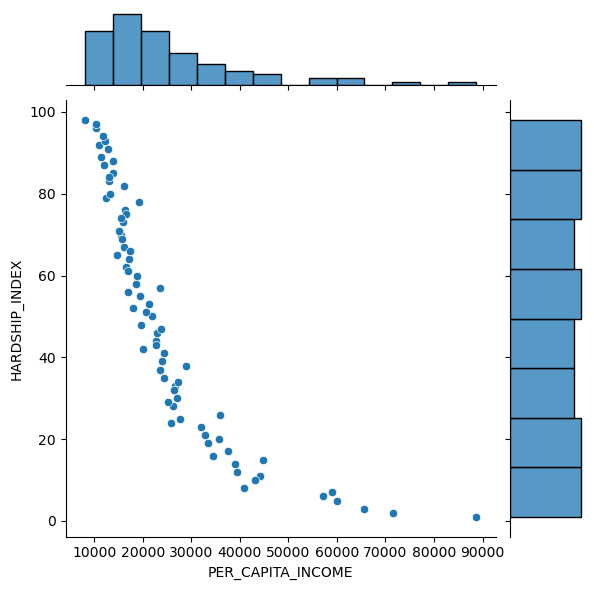

You can see that as Per Capita Income rises as the Hardship Index decreases. We see that the points on the scatter plot are somewhat closer to a straight line in the negative direction, so we have a negative correlation between the two variables.


In [83]:
# Creating a scatter plot using the variables PER_CAPITA_INCOME and HARDSHIP_INDEX then explaining the correlation between the two variables
query = "SELECT PER_CAPITA_INCOME, HARDSHIP_INDEX  \
         FROM CENSUS_DATA;"
df = pd.read_sql(query, con)

plot = sns.jointplot(x = "PER_CAPITA_INCOME", y = "HARDSHIP_INDEX", data = df)

plt.show()
print("You can see that as Per Capita Income rises as the Hardship Index decreases. "
      "We see that the points on the scatter plot are somewhat closer to a straight line "
      "in the negative direction, so we have a negative correlation between the two variables.")

In [84]:
# Close the connection
conn.close()